In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

%matplotlib inline

2024-07-19 22:35:31.494414: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-19 22:35:31.498649: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-19 22:35:31.510991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 22:35:31.531585: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 22:35:31.537344: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-19 22:35:31.552006: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Loading the dataset
data = mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = data

In [4]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Number of unique classes in the target: {len(np.unique(y_train))}")

Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)
Number of unique classes in the target: 10


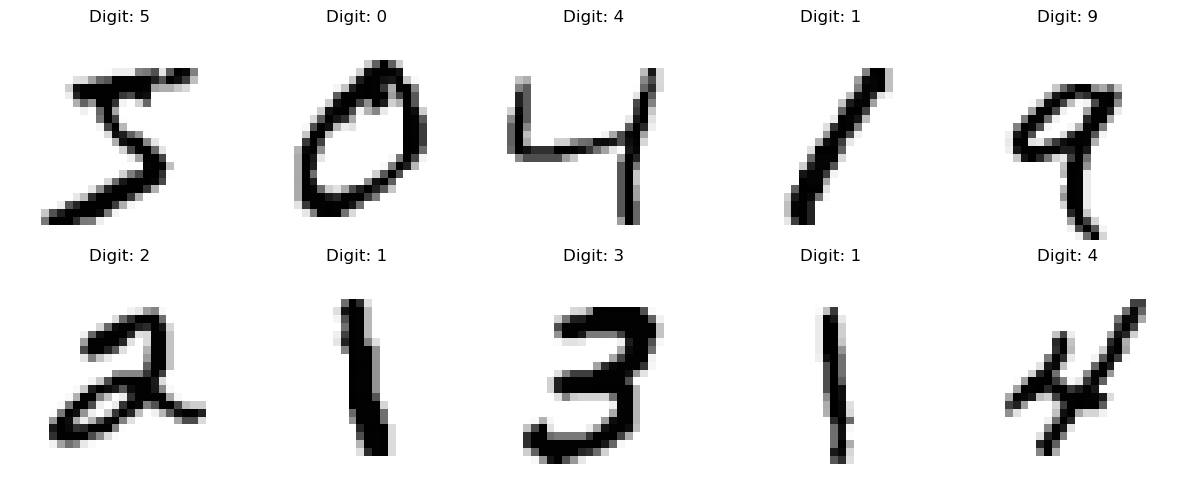

In [6]:
# Plotting the digits
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel() # Flatten the array to 1D

for i in range(10):
    axes[i].imshow(X_train[i], cmap=plt.cm.gray_r)
    axes[i].set_title(f"Digit: {y_train[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Checking the size of the test dataset
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

So the total of 70K images are divided into 9:1 ratio, meaning 90% of the total dataset is the training set and the rest 10% is test set.

We are going to use RandomForest Algorithm for the classification task

In [8]:
# To train the model, we need to reshape the datasets into 2D i.e. converting from (60000, 28, 28) to (60000, 784) [28*28]
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Implementing Random Forest Classifier

In [12]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1) # By default n_estimators = 100

In [13]:
rf.fit(X_train_flat, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [14]:
y_pred_rf = rf.predict(X_test_flat)

#### Implementing Bagging Classifier

In [15]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42, n_jobs=-1)

In [16]:
bagging.fit(X_train_flat, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_jobs=-1,
                  random_state=42)

In [17]:
y_pred_bagging = bagging.predict(X_test_flat)

#### Implementing Voting Classifier

In [18]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

In [19]:
voting = VotingClassifier(estimators=[('svm', svm), ('dt', dt)], voting='soft')

In [20]:
voting.fit(X_train_flat, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [21]:
y_pred_voting = voting.predict(X_test_flat)

In [22]:
results = {
    'Random Forest Classifier': y_pred_rf,
    'Bagging Classifier': y_pred_bagging,
    'Voting Classifier': y_pred_voting
}

In [23]:
for name, y_pred in results.items():
    accuracy = accuracy_score(y_pred, y_test)
    print(f"\n{name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report: ")
    print(classification_report(y_test, y_pred))


Random Forest Classifier
Accuracy: 0.9704
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Bagging Classifier
Accuracy: 0.9382
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
    

In [ ]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Visualizing the results

In [33]:
accuracies = [accuracy_score(y_pred, y_test) for y_pred in results.values()]
models = list(results.keys())

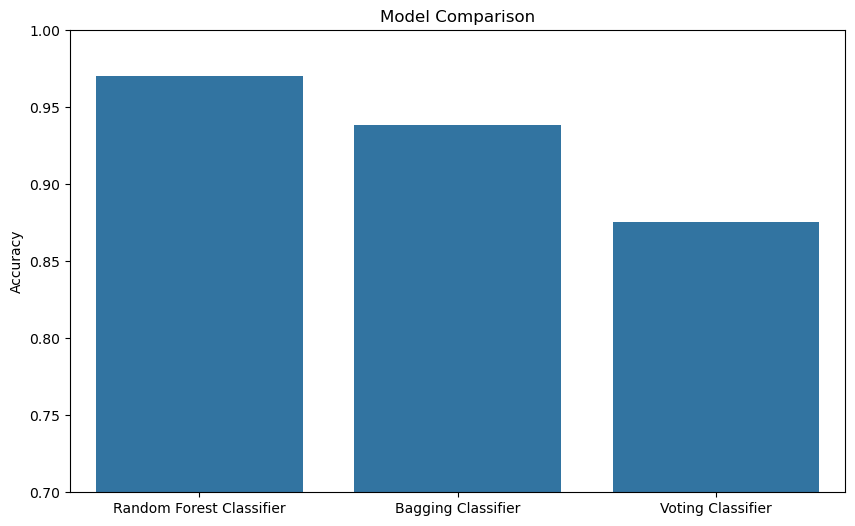

In [34]:
# Visualization of model comparision using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)  # Adjust as needed
plt.show()

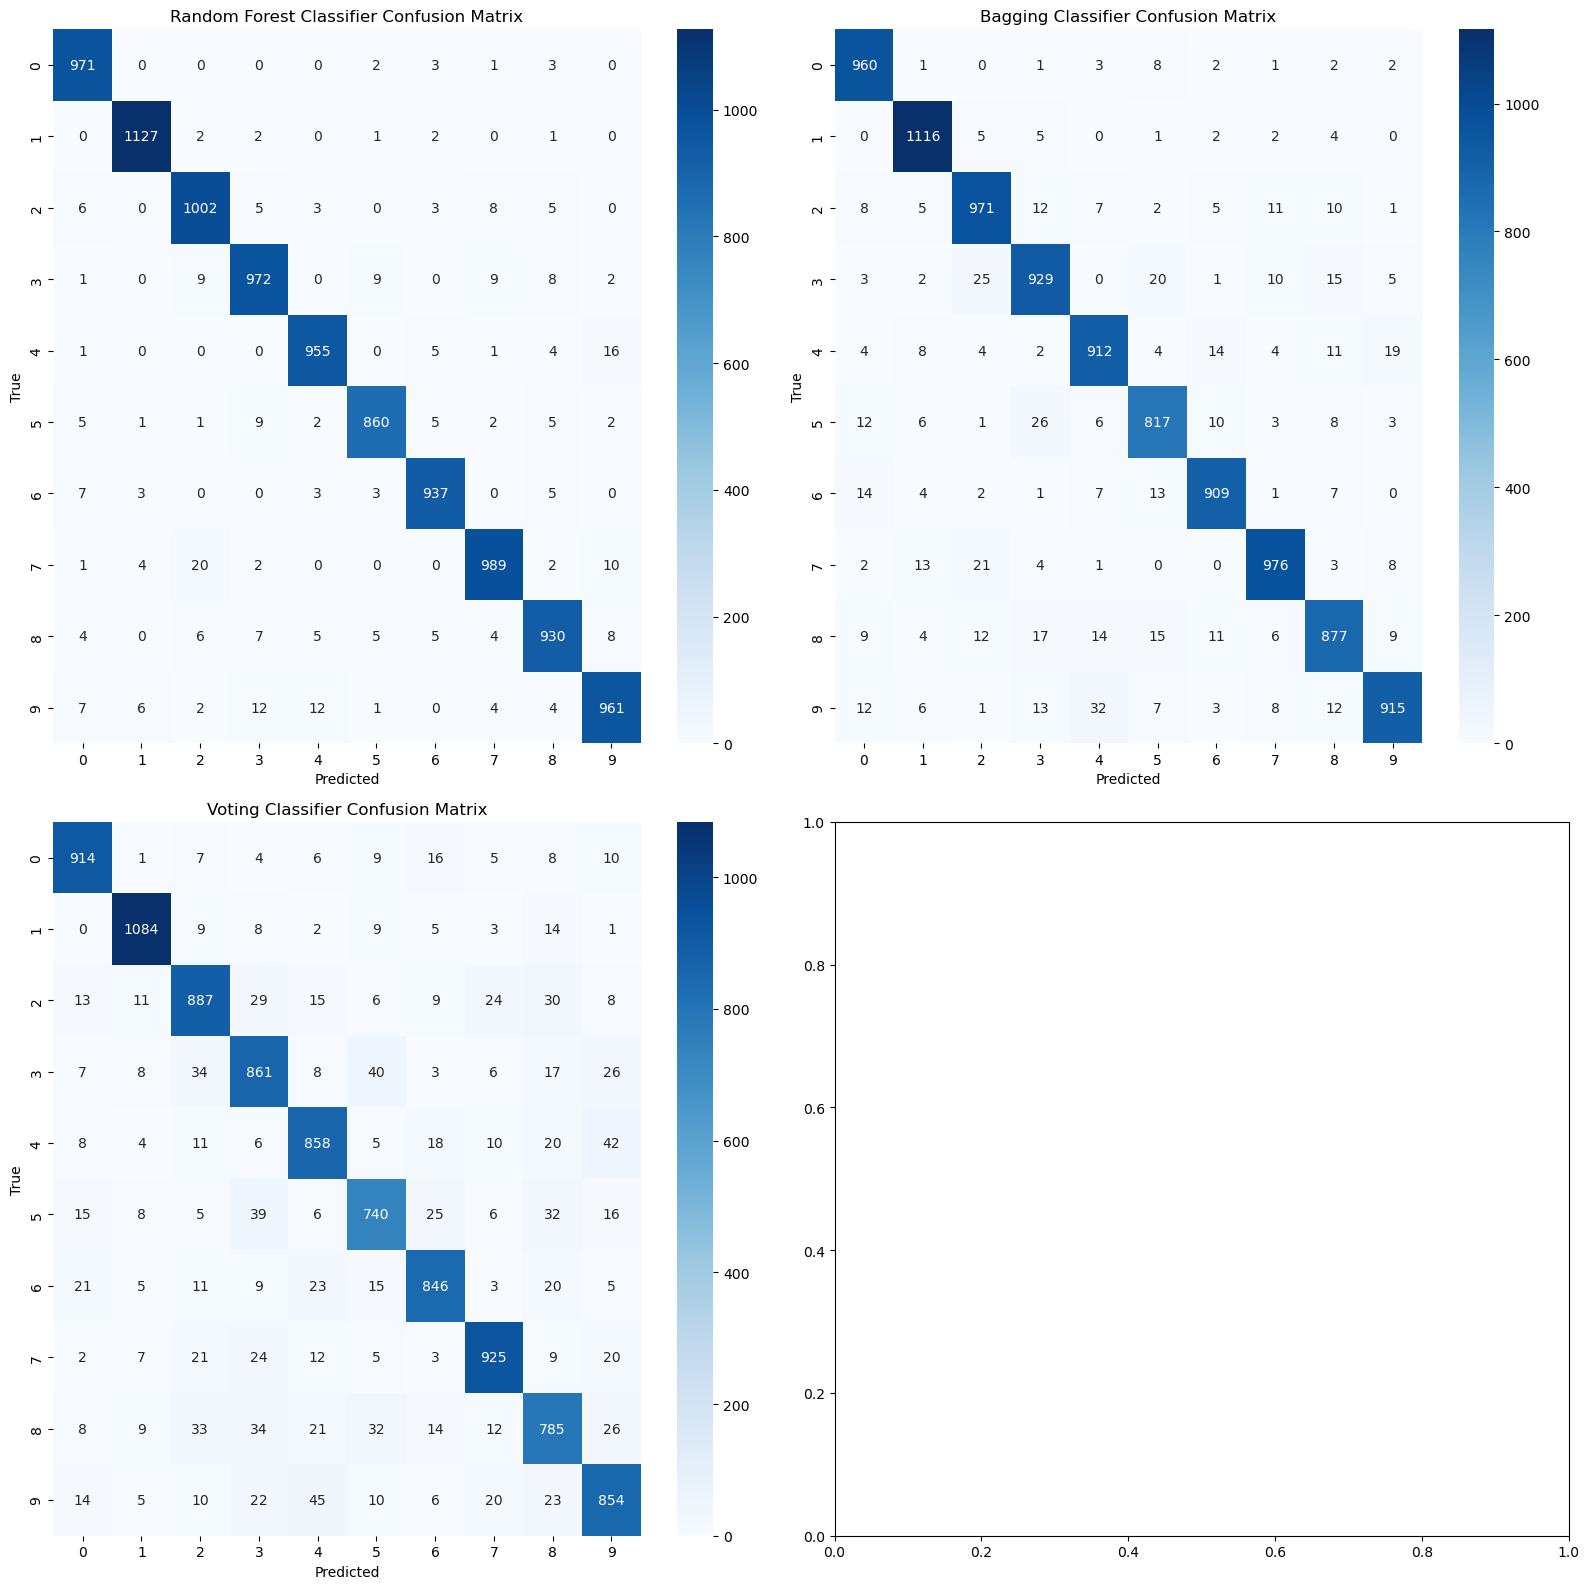

In [35]:
# Confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.ravel()

for i, (name, y_pred) in enumerate(results.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

In [36]:
# Lets save the model locally
import joblib
import numpy as np
from PIL import Image, ImageOps

In [37]:
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(bagging, 'bagging_model.pkl')
joblib.dump(voting, 'voting_model.pkl')

['voting_model.pkl']